# K-Armed Bandits - Average Rewards Method

In [4]:
%matplotlib inline

In [5]:
import numpy as np
import matplotlib.pyplot as plt

## Choosing rewards rewards for each arm of the bandit

#### We sample the true action values (k=10) from a normal distribution with mean=0 and variance=1. After having chosen these k values, we sample the rewards at each timestep t from a distribution where mean=action_value and variance=1

/var/folders/9w/c9jphzhs0dq3nw_2q9l_l1yr0000gp/T/ipykernel_29982/2668358173.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


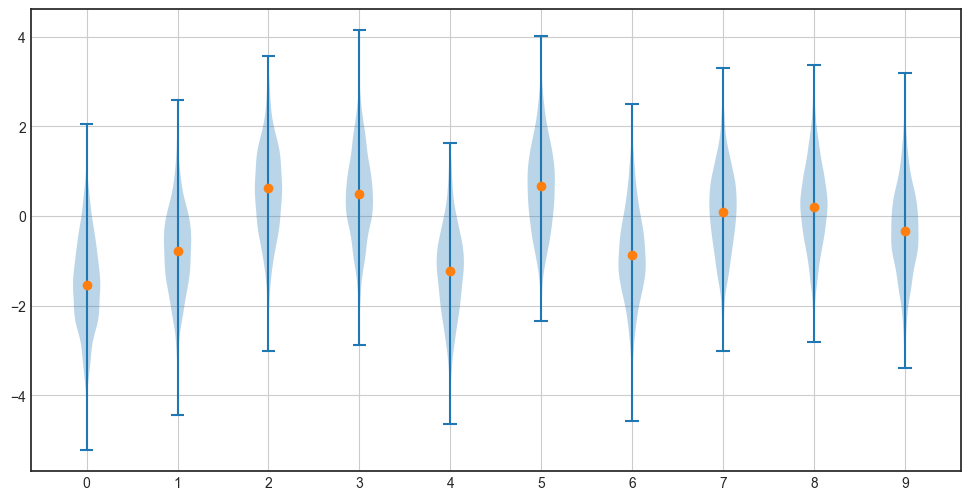

In [12]:
k=10
k_arms = np.zeros((10))
for i in range(k):
    k_arms[i] = np.random.normal()
data = []
for i in range(k):
    data.append(np.random.normal(loc=k_arms[i], scale=1, size=1000))
plt.style.use('seaborn-white')
fig, axs = plt.subplots(figsize=(12, 6))
axs.violinplot(data, range(k), widths=0.3)
axs.grid()
axs.set_xticks(range(k))
axs.plot(range(k), k_arms, 'o')

## A bandit episode is a single run of the problem (=1000 steps) with a particular k-bandit configuration
## A bandit run comprises of multiple runs of bandit episodes (=2000) and averaging the results

In [14]:
def bandit_episode(k, steps, eps=0.1):
    rewards = []
    opt_act = []
    k_reward = [0]*k
    k_value = {i:[0] for i in range(k)}
    cum_rew = []
    total_reward = 0
    # initialize the arm mean rewards
    for i in range(k):
        k_arms[i] = np.random.normal()
    opt_ix = np.argmax(k_arms)
    # run the algorithm for specified steps
    for i in range(steps):
        if np.random.random() < eps:
            # do the exploration, randomly choose an action
            ix = np.random.choice(list(range(k)))
            
        else:
            # do the greedy exploitation. choose the action with max reward. if multiple actions
            # with max reward, choose one randomly
            ix = np.random.choice(np.argwhere(k_reward == np.amax(k_reward)).flatten().tolist())
        r = np.random.normal(loc=k_arms[ix], scale=1)
        opt_act.append(ix==opt_ix)
        rewards.append(r)
        total_reward += r
        cum_rew.append(total_reward)
        k_value[ix].append(r)
        k_reward[ix] = np.average(k_value[ix])
    return (rewards, opt_act, cum_rew)

def bandit_run(episodes, steps_per_episode, eps):
    results = []
    for i in range(episodes):
        results.append(bandit_episode(k=10, steps=steps_per_episode, eps=eps))
    rewards, reward_opt, reward_cm = np.array([r[0] for r in results]), np.array([r[1] for r in results]), np.array([r[2] for r in results])
    return np.average(rewards, axis=0), np.average(reward_opt, axis=0), np.average(reward_cm, axis=0)

## Run the k-bandits in different epsilon combinations

In [20]:
greedy, greedy_opt, greedy_cm = bandit_run(episodes=2000, steps_per_episode=1000, eps=0)
eps_1, eps_1_opt, eps_1_cm = bandit_run(episodes=2000, steps_per_episode=1000, eps=0.01)
eps_10, eps_10_opt, eps_10_cm = bandit_run(episodes=2000, steps_per_episode=1000, eps=0.1)

## Plot the results for different epsilon runs

/var/folders/9w/c9jphzhs0dq3nw_2q9l_l1yr0000gp/T/ipykernel_29982/3480927062.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


Text(0, 0.5, 'Cumulative Reward')

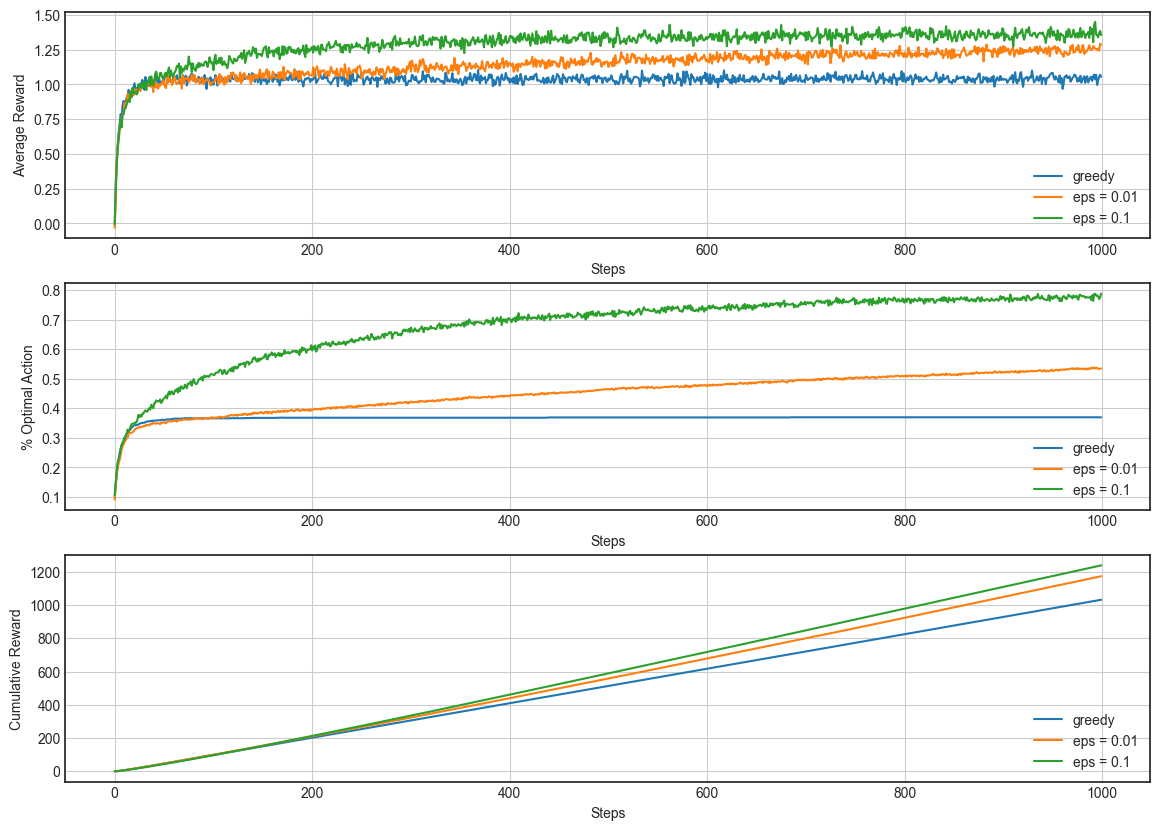

In [21]:
plt.style.use('seaborn-white')
fig, axs = plt.subplots(3,1, figsize=(14,10))
axs[0].grid()
axs[0].plot(range(len(greedy)), greedy, label='greedy')
axs[0].plot(range(len(eps_1)), eps_1, label='eps = 0.01')
axs[0].plot(range(len(eps_10)), eps_10, label='eps = 0.1')
axs[0].legend(loc="lower right")
axs[0].set_xlabel("Steps")
axs[0].set_ylabel("Average Reward")
axs[1].grid()
axs[1].plot(range(len(greedy_opt)), greedy_opt, label='greedy')
axs[1].plot(range(len(eps_1_opt)), eps_1_opt, label='eps = 0.01')
axs[1].plot(range(len(eps_10_opt)), eps_10_opt, label='eps = 0.1')
axs[1].legend()
axs[1].legend(loc="lower right")
axs[1].set_xlabel("Steps")
axs[1].set_ylabel("% Optimal Action")\

axs[2].grid()
axs[2].plot(range(len(greedy_cm)), greedy_cm, label='greedy')
axs[2].plot(range(len(eps_1_opt_cm)), eps_1_opt_cm, label='eps = 0.01')
axs[2].plot(range(len(eps_10_opt_cm)), eps_10_opt_cm, label='eps = 0.1')
axs[2].legend()
axs[2].legend(loc="lower right")
axs[2].set_xlabel("Steps")
axs[2].set_ylabel("Cumulative Reward")